In [2]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [3]:
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [11]:
def rho_green_light(x, rho_light):
    rho = numpy.zeros_like(x)
    mask = numpy.where(x < 2.0)
    rho[mask] = rho_light * x[mask] / 2.0
    return rho

In [12]:
nx=81
L=4.0
dx=L/(nx-1)
nt=30
u_max=1.0
rho_max=10.0
rho_light = 10.0
x = numpy.linspace(0.0, L, num=nx)
rho0 = rho_green_light(x, rho_light)

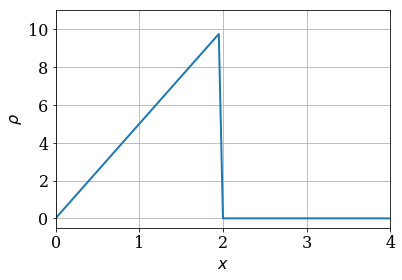

In [13]:
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
pyplot.plot(x, rho0, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(-0.5, 11.0);

In [14]:
def flux(rho, u_max, rho_max):
    F = rho * u_max * (1.0 - rho / rho_max)
    return F

In [15]:
def ftbs(rho0, nt, dt, dx, bc_value, *args):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        # Compute the flux.
        F = flux(rho, *args)
        # Advance in time.
        rho[1:] = rho[1:] - dt / dx * (F[1:] - F[:-1])
        # Set the left boundary condition.
        rho[0] = bc_value
        # Record the time-step solution.
        rho_hist.append(rho.copy())
    return rho_hist

In [16]:
sigma = 1.0
dt = sigma * dx / u_max

In [17]:
rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], u_max, rho_max)

In [18]:
from matplotlib import animation
from IPython.display import HTML

In [25]:
def update_plot(nt):
    
    fig = pyplot.figure(figsize=(6.0, 4.0))
    pyplot.xlabel(r'$x$')
    pyplot.ylabel(r'$\rho$')
    pyplot.grid()
    line = pyplot.plot(x, rho_hist[nt],
                        color='C0', linestyle='-', linewidth=2)[0]
    pyplot.xlim(0.0, L)
    pyplot.ylim(-0.5, 11.0)
    fig.tight_layout()
    fig.suptitle('Time step{:0>2}'.format(nt))

In [26]:
import ipywidgets
nt_slider=ipywidgets.IntSlider(value=0,min=0,max=nt,step=1,description='time step')

w=ipywidgets.interactive(update_plot,nt=nt_slider)
display(w)

interactive(children=(IntSlider(value=0, description='time step', max=40), Output()), _dom_classes=('widget-in…

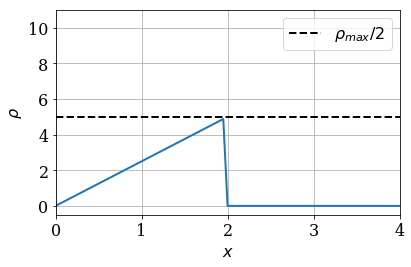

In [27]:
nt = 40  
rho_light = 5.0  


rho0 = rho_green_light(x, rho_light)


fig = pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
line = pyplot.plot(x, rho0,
                   color='C0', linestyle='-', linewidth=2)[0]
pyplot.hlines(rho_max / 2.0, 0.0, L,
              label=r'$\rho_{max} / 2$',
              color='black', linestyle='--', linewidth=2)
pyplot.legend()
pyplot.xlim(0.0, L)
pyplot.ylim(-0.5, 11.0)
fig.tight_layout()

In [28]:
rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], u_max, rho_max)

In [29]:
import ipywidgets
nt_slider=ipywidgets.IntSlider(value=0,min=0,max=nt,step=1,description='time step')

w=ipywidgets.interactive(update_plot,nt=nt_slider)
display(w)

interactive(children=(IntSlider(value=0, description='time step', max=40), Output()), _dom_classes=('widget-in…

In [31]:
rho_light = 4.0
u_max = 1.1
rho0 = rho_green_light(x, rho_light)
rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], u_max, rho_max)
import ipywidgets
nt_slider=ipywidgets.IntSlider(value=0,min=0,max=nt,step=1,description='time step')

w=ipywidgets.interactive(update_plot,nt=nt_slider)
display(w)

interactive(children=(IntSlider(value=0, description='time step', max=40), Output()), _dom_classes=('widget-in…